# 3 Problemset 

Load libraries. No need for GPU support. 

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## 3.6 Gradient descent of quadratic functions

Recall from problem 3.5 that quadratic functions have linear gradients: for any $2\times 2$ matrix $A$, one has
$$f:\mathbb R^2\to\mathbb R^2,\qquad f(x)=x^\top Ax, \qquad \nabla f(x) = (A+A^\top)x.$$
Here is a plot of $f$ and some of its gradient descent (or rather gradient flow) trajectories.

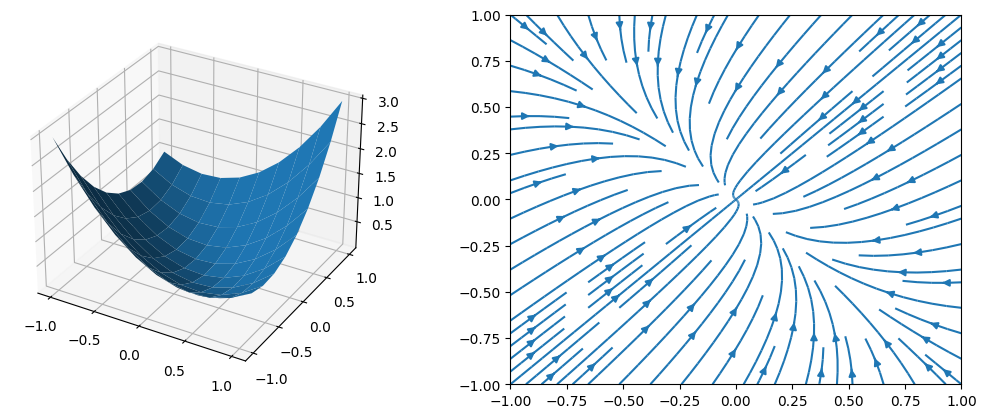

In [2]:
def plot_gradient_flow(A):
  x = np.mgrid[-1:1:10j, -1:1:10j][[1,0]]
  f = np.einsum('ikl,ij,jkl->kl', x, A, x)
  B = -(A+A.transpose())
  grad = np.einsum('ij,jkl->ikl', B, x)
  fig = plt.figure(figsize=[2*6.4, 4.8])
  ax = fig.add_subplot(121, projection='3d')
  ax.plot_surface(x[0], x[1], f)
  ax = fig.add_subplot(122)
  ax.streamplot(x[0], x[1], grad[0], grad[1])
  plt.show()

A = np.array([[1, 1], [0, 1]])
plot_gradient_flow(A)

Experiment with various matrices $A$. Verify that the anti-symmetric part of $A$ does not matter, and use only symmetric matrices from there on. Try to find out under what conditions the gradient flow converges. Hint: This depends on the eigenvalues of $A$. 

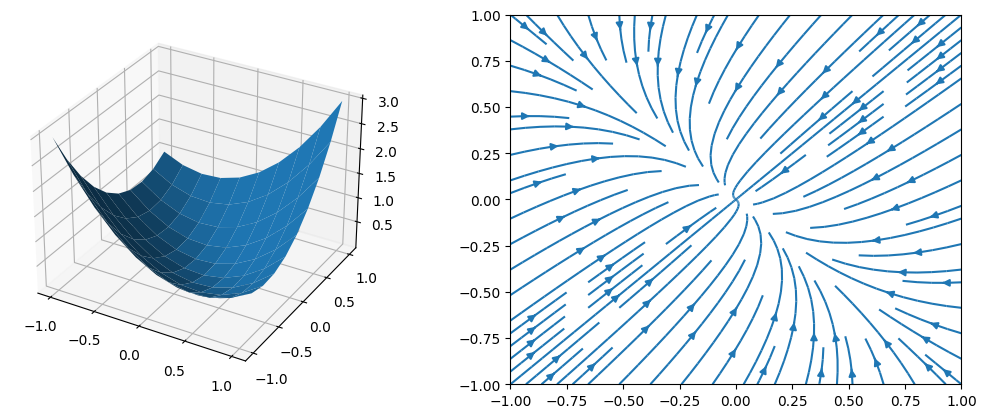

In [3]:
B=np.array([[1, 0], [1, 1]])
plot_gradient_flow(B)

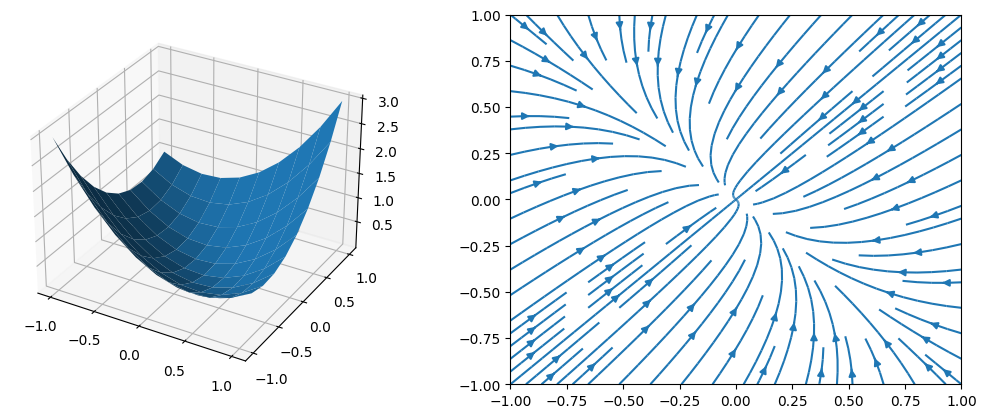

In [4]:
C = np.array([[1, 0.5], [0.5, 1]])
plot_gradient_flow(C)

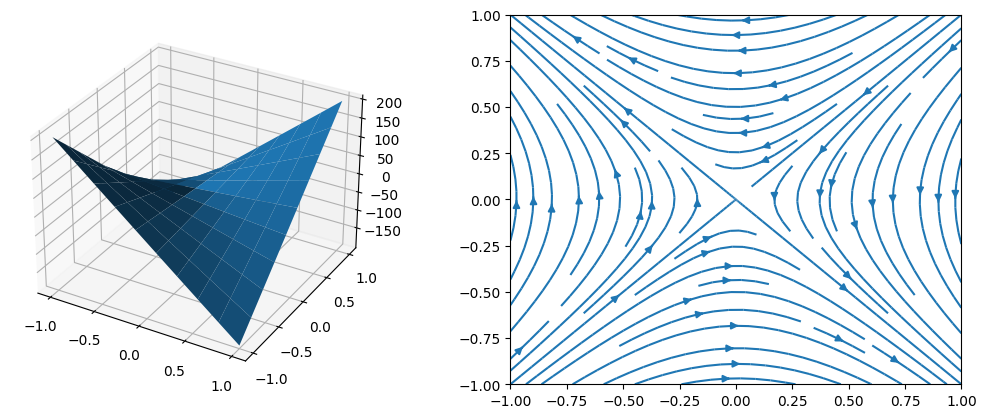

In [5]:
C = np.array([[1, 100], [100, 1]])
plot_gradient_flow(C)

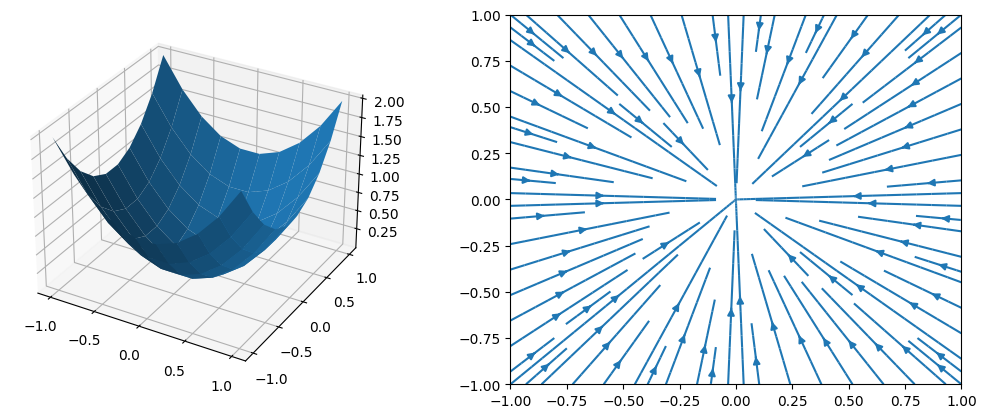

In [6]:
C = np.array([[1, 0], [0, 1]])
plot_gradient_flow(C)